## Exercicio de Decision Tree

Jader Gomes

In [8]:
#bibliotecas
import os
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier

In [9]:
headers = ["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]
dataset = pd.read_csv("car_data.csv", header=None, names=headers)

dataset = dataset.sample(frac=1).reset_index(drop=True) 

dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,low,low,5more,more,small,high,good
1,high,high,4,2,big,high,unacc
2,low,vhigh,4,more,big,low,unacc
3,high,high,2,4,small,low,unacc
4,vhigh,vhigh,4,4,big,med,unacc


In [10]:
# Transformando os dados categóricos(small, med, low, ...) em numéricos
for h in headers:
    dataset[h] = dataset[h].astype('category')
    dataset[h] = dataset[h].cat.codes

dataset.set_index("class", inplace=True)
dataset.head()

,buying,maint,doors,persons,lug_boot,safety
class,,,,,,
1,1,1,3,2,2,0
2,0,0,2,0,0,0
2,1,3,2,2,0,1
2,0,0,0,1,2,1
2,3,3,2,1,0,2


In [11]:
# Dividindo o dataset
size = len(dataset)
train_size = int(math.floor(size * 0.75))
train_data = dataset[:train_size]
test_data = dataset[train_size:]

print(train_data)
print(test_data)

       buying  maint  doors  persons  lug_boot  safety
class                                                 
1           1      1      3        2         2       0
2           0      0      2        0         0       0
2           1      3      2        2         0       1
2           0      0      0        1         2       1
2           3      3      2        1         0       2
2           1      0      2        2         1       1
1           2      1      0        2         0       2
2           3      2      3        1         0       1
2           2      1      1        0         1       1
0           2      2      1        1         2       0
2           2      1      1        0         0       0
2           2      2      1        1         0       1
2           3      0      3        1         2       2
0           0      0      1        1         0       0
2           3      2      0        1         1       2
0           3      1      2        2         0       0
2         

In [12]:
# Treinando a árvore de decisão com critério gini

d_tree = DecisionTreeClassifier(criterion="gini")
d_tree.fit(train_data, train_data.index) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
# Fazendo as predições através da árvore de decisão
d_tree.predict(test_data.iloc[:, 0:6])

d_tree.score(test_data, test_data.index)

0.97453703703703709

In [14]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]) 
graph = graphviz.Source(dot_data) 
graph.render("car_dataset")

ModuleNotFoundError: No module named 'graphviz'

QUESTAO 1

In [15]:
d_tree2 = DecisionTreeClassifier(criterion="entropy")
d_tree2.fit(train_data, train_data.index)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
d_tree2.predict(test_data.iloc[:, 0:6])
d_tree2.score(test_data, test_data.index)

0.98148148148148151

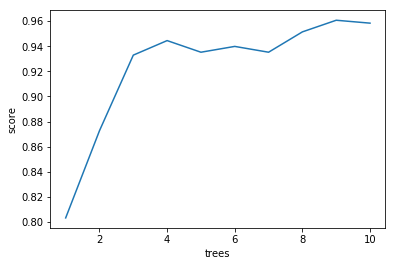

In [19]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def randomForestScores(limitTrees, train_data):
    scores = []
    for i in range(1, limitTrees):
        toFitTrainData = train_data
        d_tree = RandomForestClassifier(n_estimators=i, criterion='entropy')
        d_tree.fit(toFitTrainData, toFitTrainData.index)
        
        d_tree.predict(test_data.iloc[:, 0:6])
        score = d_tree.score(test_data, test_data.index)
        scores.append(score)
    return scores

scores = randomForestScores(11, train_data) 

plt.plot(range(1, 11), scores)
plt.xlabel('trees')
plt.ylabel('score')
plt.show()